# Testing Bootcalib robustness to Cosmic Rays

In [1]:
%matplotlib inline

In [2]:
# imports
try:
    import seaborn as sns; sns.set(context="notebook",font_scale=2)
except:
    pass

from desispec import bootcalib as desiboot
from desiutil import funcfits as dufits
from astropy.io import fits
from astropy.stats import sigma_clip

import numpy as np
from astropy.modeling import models, fitting

/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## r camera

In [24]:
# Read
fiberflat = '/Users/xavier/DESI/Wavelengths/CRs/pix-r0-00000000.fits.gz'
flat_hdu = fits.open(fiberflat)
header = flat_hdu[0].header
flat = flat_hdu[0].data
ny = flat.shape[0]

In [25]:
# Find Fibers
xpk, ypos, cut = desiboot.find_fiber_peaks(flat)

INFO:bootcalib.py:657:find_fiber_peaks: starting


INFO:DESI:starting


INFO:bootcalib.py:694:find_fiber_peaks: Found 500 fibers


INFO:DESI:Found 500 fibers


INFO:bootcalib.py:702:find_fiber_peaks: Found 20 bundles


INFO:DESI:Found 20 bundles


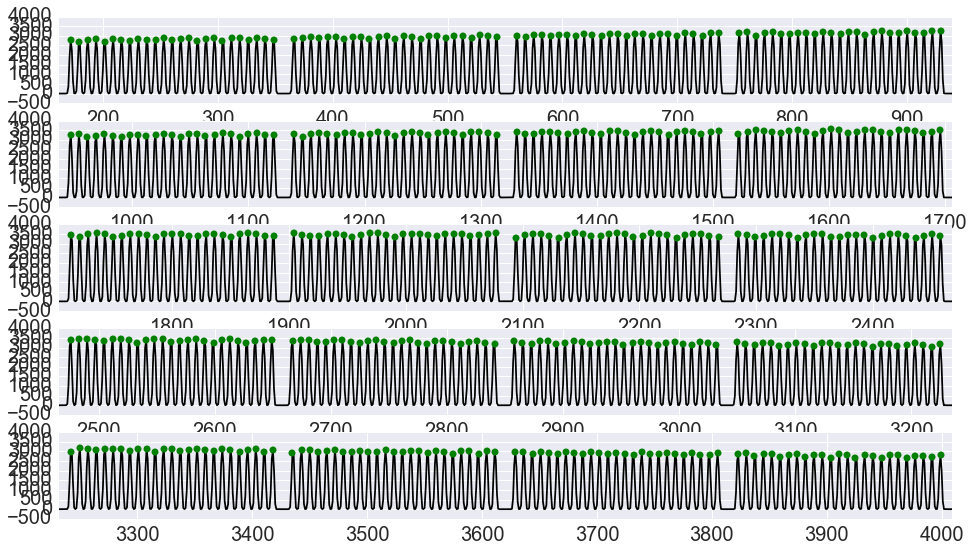

In [26]:
reload(desiboot)
desiboot.qa_fiber_peaks(xpk, cut)

In [37]:
# Crude first
xset, xerr = desiboot.trace_crude_init(flat,xpk,ypos)
# Polynomial fits
xfit, fdicts = desiboot.fit_traces(xset,xerr)

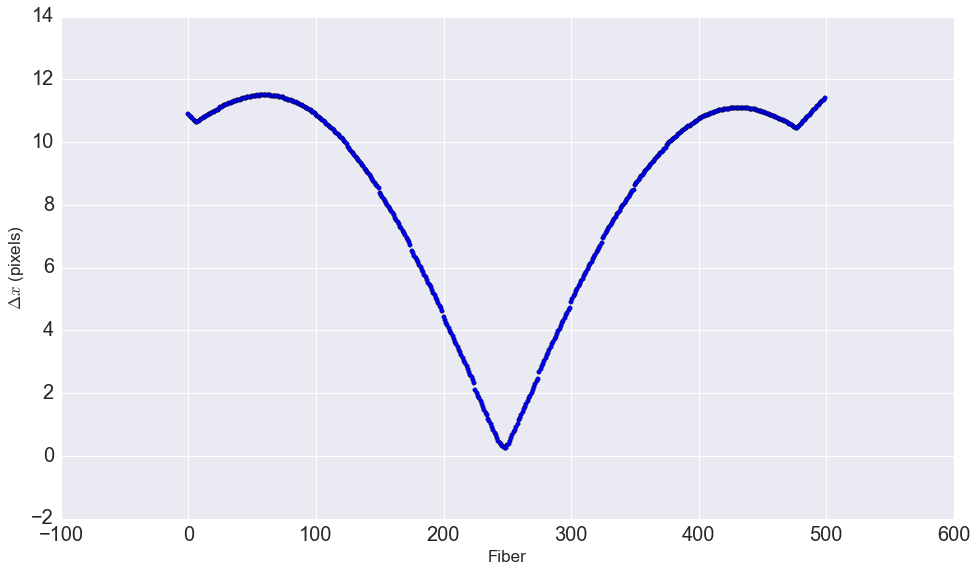

In [38]:
# QA
desiboot.qa_fiber_Dx(xfit, fdicts)

INFO:bootcalib.py:580:fiber_gauss: Working on fiber 0 of 500


INFO:DESI:Working on fiber 0 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 25 of 500


INFO:DESI:Working on fiber 25 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 50 of 500


INFO:DESI:Working on fiber 50 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 75 of 500


INFO:DESI:Working on fiber 75 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 100 of 500


INFO:DESI:Working on fiber 100 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 125 of 500


INFO:DESI:Working on fiber 125 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 150 of 500


INFO:DESI:Working on fiber 150 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 175 of 500


INFO:DESI:Working on fiber 175 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 200 of 500


INFO:DESI:Working on fiber 200 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 225 of 500


INFO:DESI:Working on fiber 225 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 250 of 500


INFO:DESI:Working on fiber 250 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 275 of 500


INFO:DESI:Working on fiber 275 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 300 of 500


INFO:DESI:Working on fiber 300 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 325 of 500


INFO:DESI:Working on fiber 325 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 350 of 500


INFO:DESI:Working on fiber 350 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 375 of 500


INFO:DESI:Working on fiber 375 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 400 of 500


INFO:DESI:Working on fiber 400 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 425 of 500


INFO:DESI:Working on fiber 425 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 450 of 500


INFO:DESI:Working on fiber 450 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 475 of 500


INFO:DESI:Working on fiber 475 of 500


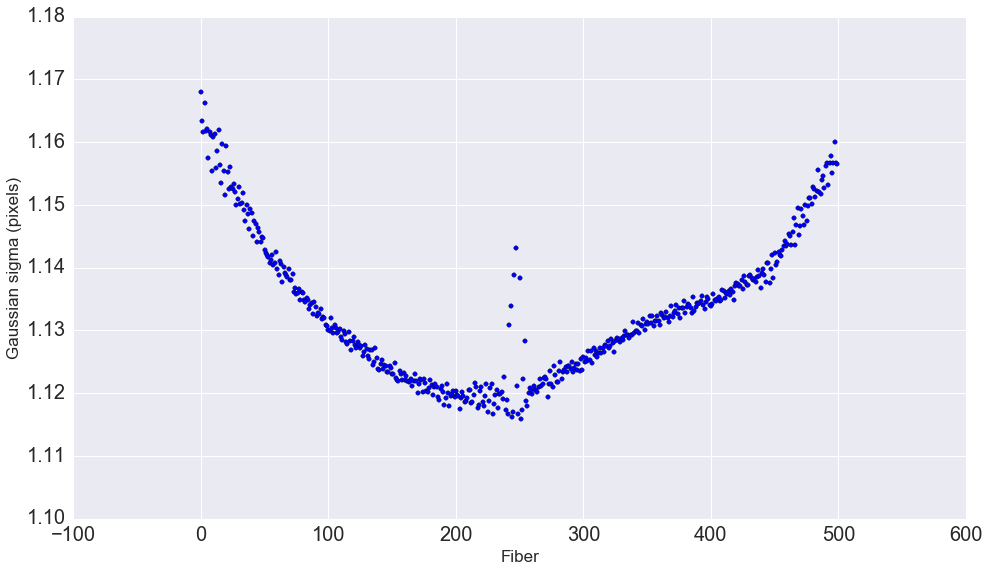

In [40]:
# Model the PSF
gauss = desiboot.fiber_gauss(flat,xfit,xerr)
desiboot.qa_fiber_gauss(gauss)